# Column

A {class}`~meerkat.Column` is a sequential data structure (analagous to a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) in Pandas or a [`Vector`](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Simple-manipulations-numbers-and-vectors) in R). Meerkat supports a diverse set of column types (*e.g.,* {class}`~meerkat.TensorColumn`, {class}`~meerkat.ImageColumn`), each intended for different kinds of data.

Below we create a simple column to hold a set of images stored on disk. To create it, we simply pass filepaths to the {class}`~meerkat.ImageColumn` constructor.

In [1]:
import os
import meerkat as mk
abs_path_to_img_dir = os.path.join(os.path.dirname(os.path.dirname(mk.__file__)), "docs/assets/guide/data_structures")

,(FileColumn)
0,
1,
2,

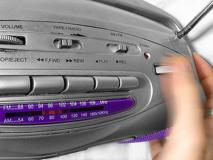
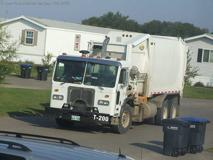
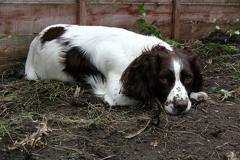

In [2]:
img_col = mk.image(
    ["img_0.jpg", "img_1.jpg", "img_2.jpg"], 
    base_dir=abs_path_to_img_dir
)
img_col

All Meerkat columns are subclasses of {class}`~meerkat.Column` and share a common interface, which includes 
{py:meth}`__len__ <meerkat.Column.__len__>`,
{py:meth}`__getitem__ <meerkat.Column.__getitem__>`, 
{py:meth}`__setitem__ <meerkat.Column.__setitem__>`, 
{py:meth}`filter <meerkat.Column.filter>`, 
{py:meth}`map <meerkat.Column.map>`, 
and {py:meth}`concat <meerkat.Column.concat>`. Below we get the length of the column we just created.

In [3]:
len(img_col)

3

Certain column types may expose additional functionality. For example, 　{class}`~meerkat.TensorColumn`　inherits most of the functionality of an　[`ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

In [4]:
id_col = mk.TensorColumn([0, 1, 2])
id_col.sum()
id_col == 1

,(NumPyTensorColumn)
0,False
1,True
2,False


If you don't know which column type to use, you can just pass a familiar data  structure like a ``list``, ``np.ndarray``, ``pd.Series``, and ``torch.Tensor`` to  {py:meth}`Column.from_data <meerkat.Column.from_data>` and Meerkat will automatically pick an appropriate column type.

In [5]:
import torch
tensor = torch.tensor([1,2,3])
mk.Column.from_data(tensor)

,(TorchTensorColumn)
0,tensor(1)
1,tensor(2)
2,tensor(3)


# Column Types

There are four core column types in Meerkat, each with a different interface.

1. {class}`~meerkat.ScalarColumn` Each row stores a single numeric or string value. These columns have an interface similar to a Pandas Series. 
2. {class}`~meerkat.TensorColumn` Each row stores an identically shaped multi-dimensional array (*e.g.* vector, matrix, or tensor). These columns have an interface similar to a NumPy ndarray. 
3. {class}`~meerkat.ObjectColumn` Each row stores an arbitrary Python object. These columns should be used sparingly, as they are significantly slower than the columns above. However, they may be useful in small DataFrames. 
4. {class}`~meerkat.DeferredColumn` Represents a *deferred* map operations. A DeferredColumn maintains a single function and a pointer to another column. Each row represents (*but does not actually store*) the value returned from applying the function to the corresponding row of the other column.

````{admonition} Flexibility in Implementation

Meerkat columns are simple wrappers around well-optimized data structures from other libraries. These libraries (e.g. NumPy) run compiled machine code that is significantly faster than routines written in Python. 

The data structure underlying a column is available through the ``.data`` attribute of the column. For example, the following code creates a {class}`~meerkat.TensorColumn` and then accesses the underlying NumPy array.

```{code-cell} ipython3
import meerkat as mk;
col = mk.TensorColumn([0,1,2]);
col.data
```

Meerkat is unopinionated when it comes to the choice of data structure underlying columns. This provides users the **flexibility** to choose the best data structure for their use case. For example, a `TensorColumn` can be backed by either a [NumPy Array](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)) or a [PyTorch Tensor](https://pytorch.org/docs/stable/tensors.html).

Each `ScalarColumn` object in Meerkat is actually an instance of one of its subclasses ({class}`~meerkat.PandasScalarColumn`, {class}`~meerkat.ArrowScalarColumn`). These subclasses are responsible for implementing the {class}`~meerkat.ScalarColumn` interface for a particular choice of data structure. Similarly, each `TensorColumn` object is an instance of its subclasses ({class}`~meerkat.NumPyTensorColumn`, {class}`~meerkat.TorchTensorColumn`). 

*How to pick a subclass?* In general, users should not have to think about which subclass to use. Meerkat chooses a subclass based on the data structure of the input data. For example, the following code creates a `ScalarColumn` backed by a Pandas Series:

```{code-cell} ipython3
mk.column([0,1,2])
```

You can also explicitly specify the subclass to use. For example, the following code creates a `ScalarColumn` backed by an Arrow array:

```{code-cell} ipython3
mk.ArrowScalarColumn([0,1,2])
```
````